$\normalsize{\textbf{Reduccion de ruido en una señal vía autocorrelación}}$

Todas las señales medidas $y(t)$ contienen ruido $n(t)$. Si la señal verdadera es $s(t)$, y si el ruido es aleatorio y solo se suma a ella como:  

$
y(t)=s(t)+n(t)
$

Entonces podemos utilizar transformadas de Fourier para "promediar" parte del ruido. Para hacer eso, introducimos la función de autocorrelación $A(\tau)$, que pliega o convoluciona la señal medida consigo misma, midiendo así la correlación de una señal consigo misma.

$
A(\tau)=\int_{-\infty}^{+\infty} dt~y^{*}(t)~y~(t+\tau) \equiv  \int_{-\infty}^{+\infty} dt~y~(t)+y^{*}~(t+\tau)
$

Aquí $\tau$ se llama el tiempo de retraso, y $A(t)$ tiende a parecerse a $y~(t)^{2}$.
Para ver cómo este plegado elimina el ruido de una señal, comenzamos con Transformada de Fourier de $y~(t) = s~(t) + n~(t)$:

$
Y(\omega)=S(\omega)+N(\omega)
$

$
S(\omega)=\int_{-\infty}^{+\infty} dt~s(t)\frac{e^{-i\omega t}}{\sqrt{2\pi}}
$

$
N(\omega)=\int_{-\infty}^{+\infty} dt~n(t)\frac{e^{-i\omega t}}{\sqrt{2\pi}}
$

Evaluamos la función de autocorrelación de la señal $y~(t) = s~(t) + n~(t)$ :

$
A_{y}(\tau)=\int_{-\infty}^{+\infty} dt[s~(t)~s~(t+\tau)+s~(t)~n~(t+\tau)+ n~(t)~n~(t+\tau)]
$

Si el ruido $n~(t)$ es aleatorio y no correlacionado en los tiempos $t$ y $t+\tau$, entonces debería promediar a cero, dejando una función de autocorrelación aproximada de la señal pura:

$
A_{y}(\tau)\simeq \int_{-\infty}^{+\infty}dt~s~(t)~s~(t+\tau)=A_{s}(\tau)
$

Sin embargo, el teorema de la convolución nos dice que la transformada de Fourier de una convolución es proporcional al producto de las dos funciones que se están convolucionando, y así:

$
A_{s}(\tau)\int_{-\infty}^{+\infty}dt~s~(t+\tau)~s~(t) \rightarrow A(\omega)\simeq \sqrt{2\pi}~|S(\omega)|^{2}
$

La función $|S(\omega)|^{2}$ se llama el espectro de potencia de la señal real y es proporcional al módulo al cuadrado de la transformada de Fourier. A menudo, el propio espectro de potencia proporciona toda la información que necesitamos sobre los componentes en una señal.

Los componentes de alta frecuencia de banda ancha, característicos del ruido, están ausentes del espectro de potencia, y por esta razón $|S(\omega)|^{2}$ proporciona una indicación clara de los componentes en la señal real.

A continuación se presenta un algoritmo que realiza la función autocorrelación para la reducción de ruido de una señal:

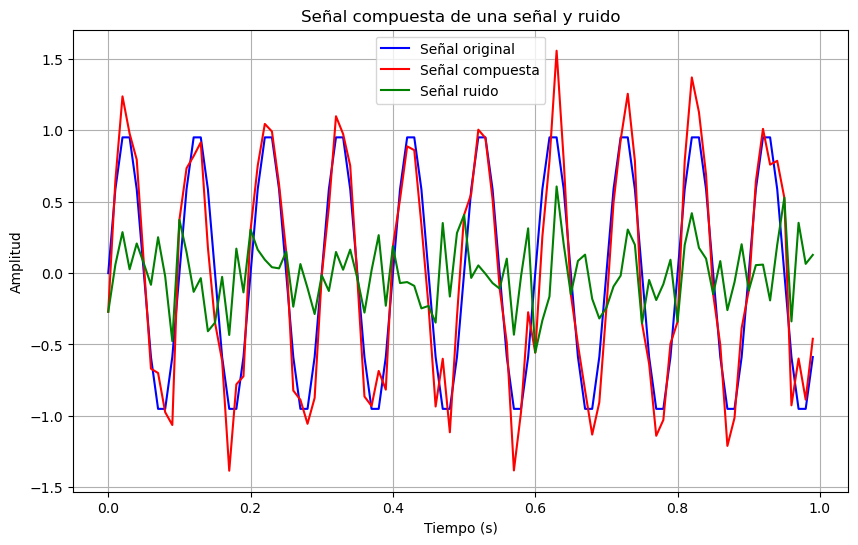

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
amplitud = 1.0
frecuencia = 10.0  # Hz
fase = 0.0

# Parámetros del ruido
media = 0.0
desviacion_estandar = 0.3

# Frecuencia de muestreo y duración de la señal
fs = 100  # Frecuencia de muestreo en Hz
duracion = 1.0  # Duración de la señal en segundos

# Vector de tiempo
t = np.linspace(0, duracion, int(fs * duracion), endpoint=False)

# Señal sinusoidal
senal = amplitud * np.sin(2 * np.pi * frecuencia * t + fase)

# Ruido gaussiano
ruido = 0.8 * np.random.normal(media, desviacion_estandar, len(t))

# Señal compuesta (señal + ruido)
senal_compuesta = senal + ruido

# Vector de tiempo para la señal compuesta
t_compuesta = np.linspace(0, duracion, len(senal_compuesta), endpoint=False)

# Gráfico de la señal original, el ruido y la señal compuesta
plt.figure(figsize=(10, 6))
plt.plot(t, senal, label='Señal original', color='blue')
plt.plot(t_compuesta, senal_compuesta, label='Señal compuesta', color='red')
plt.plot(t, ruido, label='Señal ruido', color= 'green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal compuesta de una señal y ruido')
plt.legend()
plt.grid(True)
plt.show()

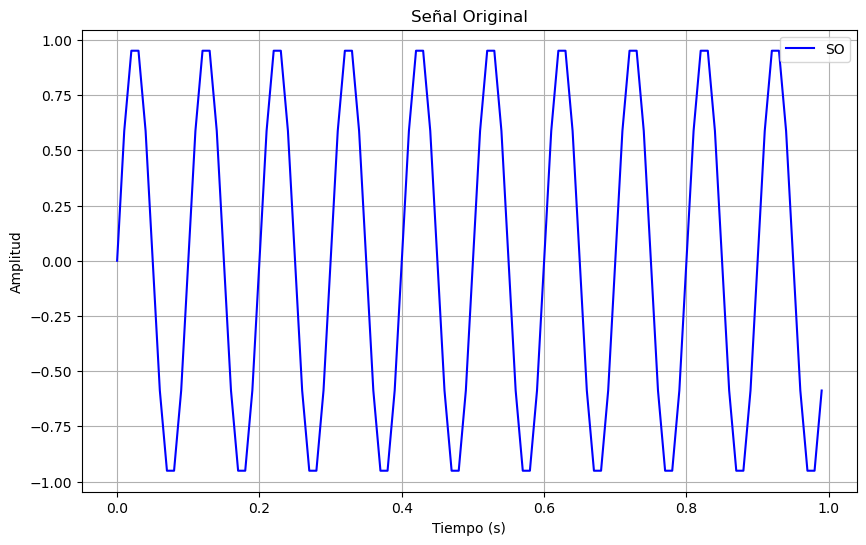

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(t, senal, label='SO', color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Original')
plt.legend()
plt.grid(True)
plt.show()

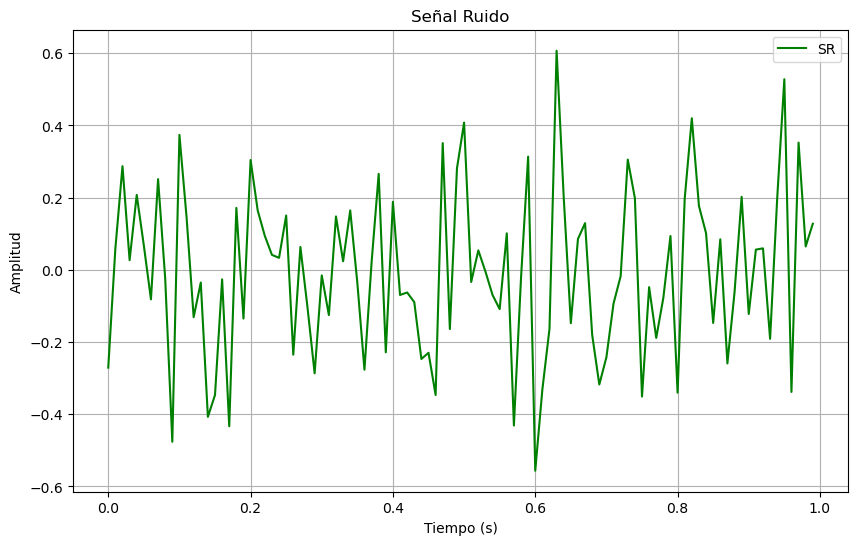

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(t_compuesta, ruido, label='SR', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Ruido')
plt.legend()
plt.grid(True)
plt.show()

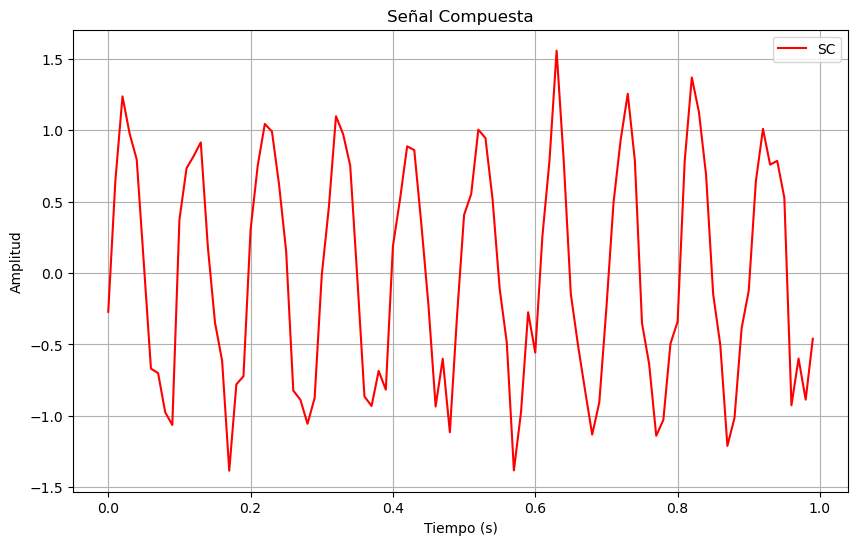

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(t, senal_compuesta, label='SC', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Compuesta')
plt.legend()
plt.grid(True)
plt.show()

Transformada de Fourier señal original:
X[0] = (5.551115123125783e-16+0j)
X[1] = (6.8833827526759706e-15+1.2725931419765857e-14j)
X[2] = (-2.2537527399890678e-14+1.5459855617905305e-14j)
X[3] = (-2.19824158875781e-14-2.273181642920008e-14j)
X[4] = (-2.7755575615628914e-15+5.551115123125783e-16j)
X[5] = (-1.5654144647214707e-14-1.479372180313021e-14j)
X[6] = (1.2212453270876722e-15-4.801714581503802e-15j)
X[7] = (2.942091015256665e-14-1.3933298959045715e-14j)
X[8] = (1.0325074129013956e-14-2.3092638912203256e-14j)
X[9] = (-1.0047518372857667e-14+1.0158540675320182e-14j)
X[10] = (-1.3489209749195652e-14-49.999999999999964j)
X[11] = (-5.773159728050814e-15+6.611378111642807e-14j)
X[12] = (4.385380947269368e-15-7.771561172376096e-15j)
X[13] = (9.2148511043888e-15+1.27675647831893e-15j)
X[14] = (-2.270406085358445e-14+1.5154544286133387e-14j)
X[15] = (5.2735593669694936e-15+2.3814283878209608e-14j)
X[16] = (-3.930189507173054e-14+7.882583474838611e-15j)
X[17] = (3.83026943495679e-15-2.10942

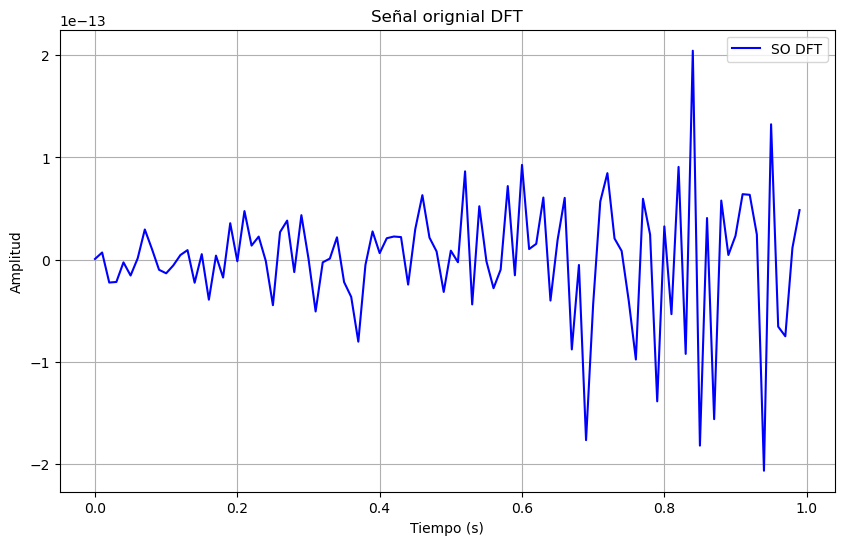

In [67]:
#Transformada de Fourier señal original

def O_dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X


x = senal  # Señal de entrada
X = O_dft(x)  # Transformada de Fourier de la señal original
X_O=X

# Imprimir los coeficientes de la transformada
print("Transformada de Fourier señal original:")
for i, coeficiente in enumerate(X_O):
    print(f"X[{i}] = {coeficiente}")

plt.figure(figsize=(10, 6))
plt.plot(t, X_O, label='SO DFT', color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal orignial DFT')
plt.legend()
plt.grid(True)
plt.show()

Transformada de Fourier señal ruido:
X[0] = (-0.7802486948635206+0j)
X[1] = (1.5978395917367627+0.4098121664095674j)
X[2] = (1.2880732917917954+1.1966204083471166j)
X[3] = (0.6209703801984341+0.8476292616735452j)
X[4] = (1.6919839131381613-0.4074173903431629j)
X[5] = (0.5636795003666255-1.3251562245345534j)
X[6] = (1.5881692018032025-1.0551441105247947j)
X[7] = (-4.16928564735013+1.3028202577495758j)
X[8] = (0.801656005944776+1.5605404928247661j)
X[9] = (-1.3976055327795844+1.5305040157430394j)
X[10] = (0.4960974936765241-2.8305623999249487j)
X[11] = (0.6172799313254731-2.634586412347512j)
X[12] = (0.44570935703896786+2.6479314999147054j)
X[13] = (-3.8243408675201342-1.4442914572834489j)
X[14] = (-1.066910127210871+0.5347098640104032j)
X[15] = (-0.5867898999055965+0.624080397059239j)
X[16] = (0.12509499091439583-0.914826738676271j)
X[17] = (0.05729232743432512-0.2725364449167501j)
X[18] = (1.0714608837851416+0.021225684848037482j)
X[19] = (1.891073532281454+0.011641485047971842j)
X[20]

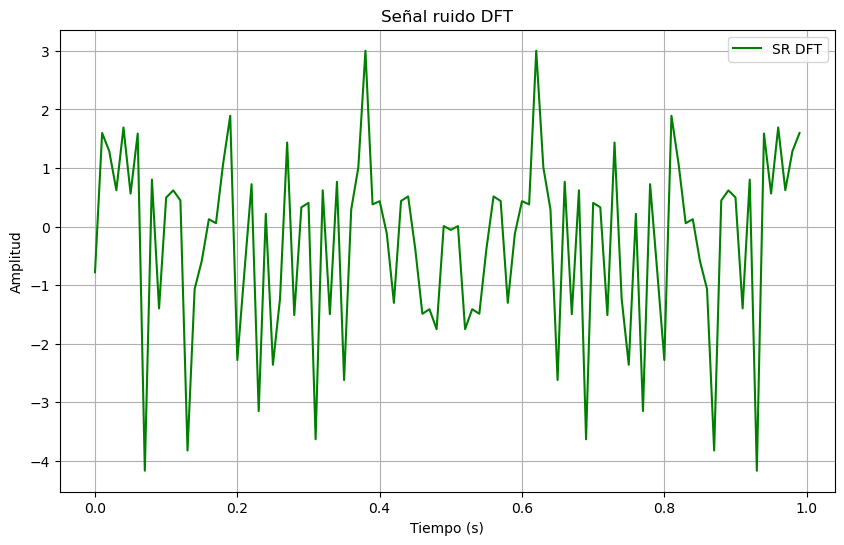

In [68]:
#Transformada de Fourier señal ruido

def R_dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

x = ruido  # Señal de entrada
X = R_dft(x)  # Transformada de Fourier de la señal ruido
X_R=X

# Imprimir los coeficientes de la transformada
print("Transformada de Fourier señal ruido:")
for i, coeficiente in enumerate(X_R):
    print(f"X[{i}] = {coeficiente}")

plt.figure(figsize=(10, 6))
plt.plot(t, X_R, label='SR DFT', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal ruido DFT')
plt.legend()
plt.grid(True)
plt.show()

Transformada de Inversa de Fourier señal original DFT:
X[0] = (2.2010479516286385e-16+4.2568032432299676e-15j)
X[1] = (0.5877852522924698-1.9047574470799366e-15j)
X[2] = (0.9510565162951591+1.0520259099098681e-15j)
X[3] = (0.9510565162951459-1.451633537958507e-14j)
X[4] = (0.5877852522924646+1.6527337130838711e-15j)
X[5] = (-4.162499030260134e-15+3.5529784214906275e-15j)
X[6] = (-0.5877852522924741+4.63208873686467e-15j)
X[7] = (-0.9510565162951563+9.72825870255155e-15j)
X[8] = (-0.9510565162951501+3.3580278485369516e-15j)
X[9] = (-0.5877852522924728+5.06255277454086e-15j)
X[10] = (7.978135409022031e-15+1.1006173251231866e-14j)
X[11] = (0.5877852522924893+2.6972617980778215e-16j)
X[12] = (0.9510565162951578-2.050106063931301e-14j)
X[13] = (0.9510565162951441+3.9015684586915934e-16j)
X[14] = (0.587785252292476-7.803463540056533e-15j)
X[15] = (3.1121171558619634e-15-1.0965814585842364e-15j)
X[16] = (-0.5877852522924828+6.924279741663903e-15j)
X[17] = (-0.9510565162951511+9.40712452167395

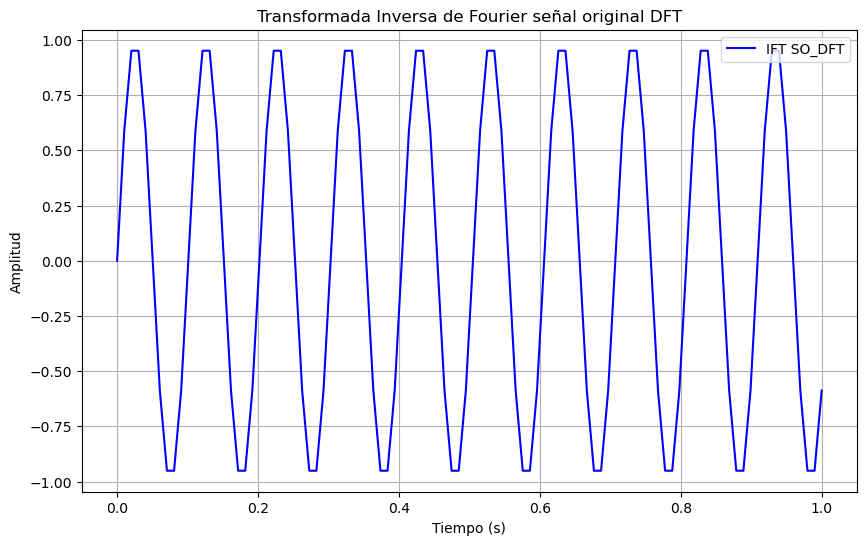

In [69]:
#Tranformada Inversa de Fourier señal original DFT

def O_ifft(X):
    N = len(X)
    x = np.zeros(N, dtype=np.complex128)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
    return x / N

X = X_O # Señal en el dominio de la frecuencia
In_O = O_ifft(X)  # Calcula la IFT

# Vector de tiempo
t = np.linspace(0, 1, len(In_O))  # Suponiendo que la duración es 1 segundo

print("Transformada de Inversa de Fourier señal original DFT:")
for i, coeficiente in enumerate(In_O):
    print(f"X[{i}] = {coeficiente}")

# Graficar la transformada inversa de Fourier
plt.figure(figsize=(10, 6))
plt.plot(t, In_O, label='IFT SO_DFT', color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Transformada Inversa de Fourier señal original DFT')
plt.legend()
plt.grid(True)
plt.show()


Transformada Inversa de Fourier señal ruido DFT:
X[0] = (-0.270928722515756+1.1196599203344705e-15j)
X[1] = (0.059319082000539036-1.389999226830696e-15j)
X[2] = (0.2871996034148933-3.844702334276917e-15j)
X[3] = (0.026825591111944096-1.085798118083403e-15j)
X[4] = (0.20753632626564492+2.2881696537524476e-15j)
X[5] = (0.06737298983554237+2.0605739337042904e-15j)
X[6] = (-0.08189446867813376+3.1408209366645678e-15j)
X[7] = (0.25123213261558397+9.703349235223868e-16j)
X[8] = (-0.023298137493465765-1.1146639167236573e-15j)
X[9] = (-0.4763636221795896-1.8207657603852566e-15j)
X[10] = (0.37386428444030634+1.9584334154387762e-15j)
X[11] = (0.14689622393809187-7.949196856316121e-16j)
X[12] = (-0.1311966733764759-1.3034018309099338e-15j)
X[13] = (-0.0352030283201821-2.375877272697835e-16j)
X[14] = (-0.40730802482116196-8.881784197001252e-16j)
X[15] = (-0.3467553406099967-4.729550084903167e-16j)
X[16] = (-0.026351762295409524-2.8244073746463984e-15j)
X[17] = (-0.4333718362630789+6.52811138479592

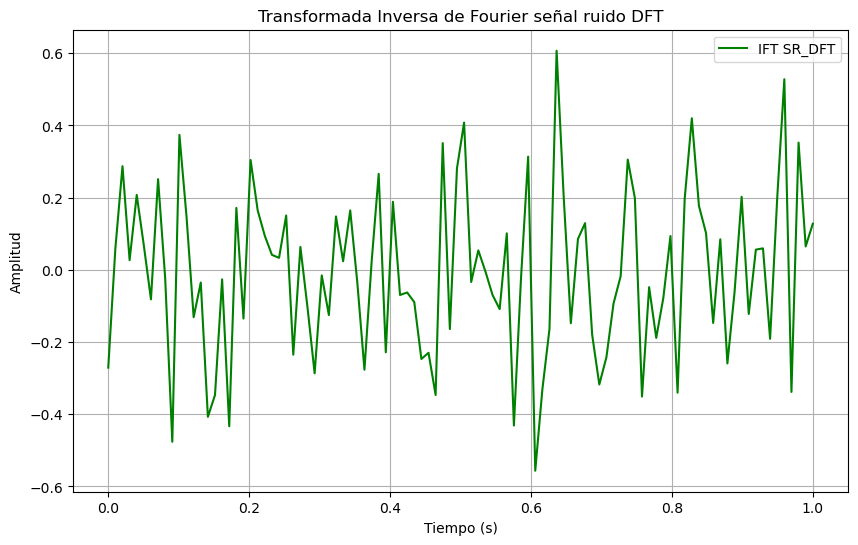

In [70]:
#Transformada Inversa de Fourier señal ruido DFT
def R_ifft(X):
    N = len(X)
    x = np.zeros(N, dtype=np.complex128)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
    return x / N

X = X_R  # Señal en el dominio de la frecuencia
In_R = R_ifft(X)  # Calcula la IFT

print("Transformada Inversa de Fourier señal ruido DFT:")
for i, coeficiente in enumerate(In_R):
    print(f"X[{i}] = {coeficiente}")

plt.figure(figsize=(10, 6))
plt.plot(t, In_R, label='IFT SR_DFT', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Transformada Inversa de Fourier señal ruido DFT')
plt.legend()
plt.grid(True)
plt.show()

Señal de autocorrelación:
X[0] = (0.2709287225157562+4.2568032432299676e-15j)
X[1] = (0.6471043342930088-1.9047574470799366e-15j)
X[2] = (1.2382561197100523+1.0520259099098681e-15j)
X[3] = (0.9778821074070899-1.451633537958507e-14j)
X[4] = (0.7953215785581095+1.6527337130838711e-15j)
X[5] = (0.0673729898355382+3.5529784214906275e-15j)
X[6] = (-0.5058907836143404+4.63208873686467e-15j)
X[7] = (-0.6998243836795723+9.72825870255155e-15j)
X[8] = (-0.9277583788016843+3.3580278485369516e-15j)
X[9] = (-0.1114216301128832+5.06255277454086e-15j)
X[10] = (0.37386428444031433+1.1006173251231866e-14j)
X[11] = (0.7346814762305812+2.6972617980778215e-16j)
X[12] = (1.0822531896716336-2.050106063931301e-14j)
X[13] = (0.9862595446153262+3.9015684586915934e-16j)
X[14] = (0.995093277113638-7.803463540056533e-15j)
X[15] = (0.3467553406099998-1.0965814585842364e-15j)
X[16] = (-0.5614334899970733+6.924279741663903e-15j)
X[17] = (-0.5176846800320722+9.407124521673953e-15j)
X[18] = (-0.7794838347827033+3.4983

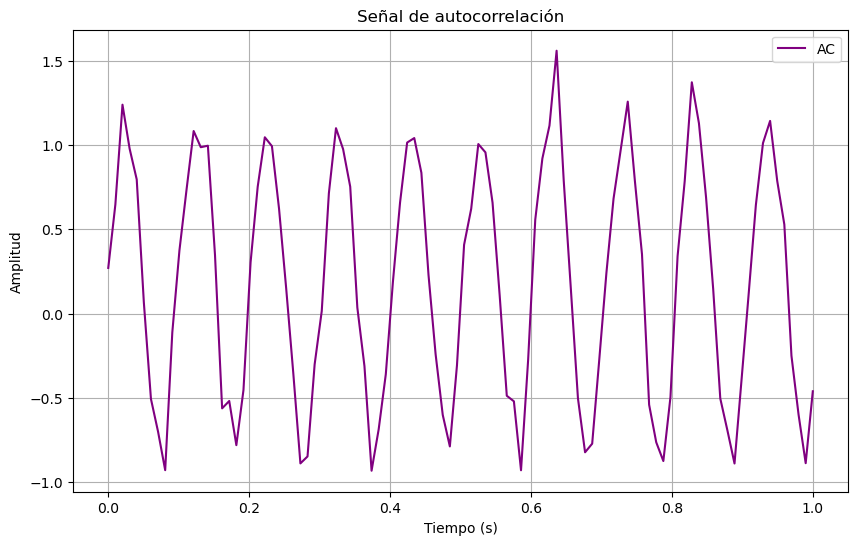

In [71]:
#Suma de ambas IFT(señal original DFT y señal ruido DFT)
senal_autocorrelacion=np.abs(In_R)+In_O

print("Señal de autocorrelación:")
for i, coeficiente in enumerate(senal_autocorrelacion):
    print(f"X[{i}] = {coeficiente}")

plt.figure(figsize=(10, 6))
plt.plot(t, senal_autocorrelacion, label='AC', color='purple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de autocorrelación')
plt.legend()
plt.grid(True)
plt.show()

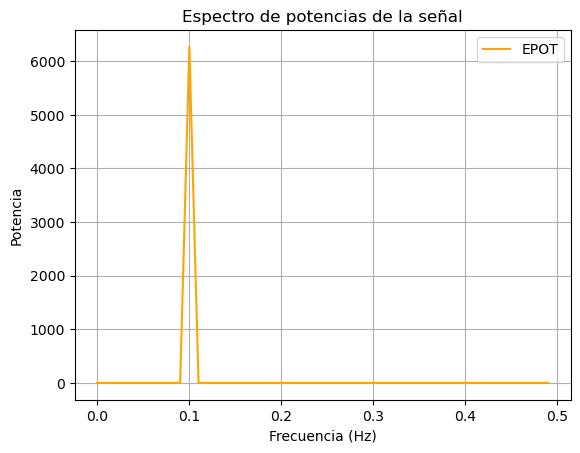

In [72]:
# Calcula la magnitud al cuadrado de la transformada de Fourier
pot = (np.abs(X_O)**2)*np.sqrt(2*np.pi)

#frecuencias correspondientes

frec = np.fft.fftfreq(len(X_O))

# Encuentra las frecuencias positivas (debido a la simetría de la FFT)
frecuencia_positiva = frec[:len(frec)//2]
pot_positiva = pot[:len(pot)//2]

# Grafica el espectro de potencias
plt.plot(frecuencia_positiva, pot_positiva, label='EPOT', color='orange')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Espectro de potencias de la señal')
plt.legend()
plt.grid(True)
plt.show()


$\normalsize{\textbf{Bibliografía}}$

*(Steven A. Gottlieb and Rubin H. Landau, Series Editors - Computacional Problems for Physics With Guided Solutions Using Python, Pag. 54-56, 2018)*
